[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rleish/controlNotebooks/blob/feature/colab/7_PID_PolePlacement_solution.ipynb)

In [2]:
# Install dependencies above what is automatic
!apt-get install libmagickwand-dev

!pip install control wand


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libmagickwand-dev is already the newest version (8:6.9.7.4+dfsg-16ubuntu6.4).
0 upgraded, 0 newly installed, 0 to remove and 3 not upgraded.


In [0]:
from IPython.display import Latex
# Add images here, show them where needed below: 
from wand.image import Image as WImage

In [0]:
# Retrieve the image files using wget
!wget -o pid_PD_control.pdf https://github.com/rleish/controlNotebooks/blob/master/figures_ch7/pid_PD_control.pdf


In [25]:
!chmod 777 pid_PD_control.pdf
!ls -l


total 64
-rw-r--r-- 1 root root  2490 Oct 17 03:12 adc.json
drwx------ 3 root root  4096 Oct 17 03:10 gdrive
-rwxrwxrwx 1 root root   521 Oct 17 03:31 pid_PD_control.pdf
-rw-r--r-- 1 root root 40970 Oct 17 03:31 pid_PD_control.pdf.1
drwxr-xr-x 2 root root  4096 Oct 15 20:47 sample_data


In [26]:
#img1 = WImage(filename='./pid_proportional_control.pdf')
#img2 = WImage(filename='./figures_ch7/pid_PI_control.pdf')
img3 = WImage(filename='./pid_PD_control.pdf')
#img4 = WImage(filename='./figures_ch7/pid_PID_control.pdf')
#img5 = WImage(filename='./figures_ch7/pid_meaning.pdf')
#img6 = WImage(filename='./figures_ch7/pid_PD_control_2.pdf')
#img7 = WImage(filename='./figures_ch7/pid_PD_control_3.pdf')

PolicyError: ignored

In [1]:
from IPython.display import IFrame
IFrame('pid_PD_control.pdf', width=700, height=350)

# Part 3 PID Control Design
## Chapter 7: Pole Placement for Second Order Systems

This Notebook will contain the lecture materials and examples (except for a few things on the board) for Lecture 9 from the [text](http://controlbook.byu.edu/doku.php).  

### Introduction
Thus far we have covered modeling a system using differential equations, simplifying those models to allow for Linear, Time Invariant (LTI) control design principles and then two ways to express those simplified equations: transfer functions and state space.  Now we begin the key concept introduced in this class: **Feeback** 

The concept of feedback is illustrated in the block diagram below. *Note the positive and negative symbols next to the summing node, those are important.*  In this case, we are using **negative feedback**.  

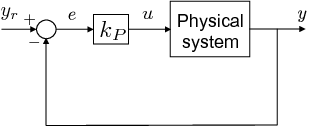

In [0]:
img1

***The most basic controller, called a proportional controller, gives commands to the physical system proportional to the error in the output variable y***

The output of the physical system is subtracted from the commanded reference output $y_r$, to produce the error $e = y_r - y$.  The *proportional* controller then creates the system input $u$ by multiplying the error by the gain $k_P$: $u = k_P e$.  

The book discusses in the Section III overview *proportional* (P), *integral* (I), and *derivative* (D) control.  The combination, PID, is the most widely used form of controller around.  One of the main advantages is that you do not need to know anything about the system you want to control.  But one key note is that you cannot guarentee the stability and performance of the closed loop system unless the **original system is a second-order system**, thus the need to discuss scond-order systems in this chapert.   The block diagrams for each of these controllers are shown below: 

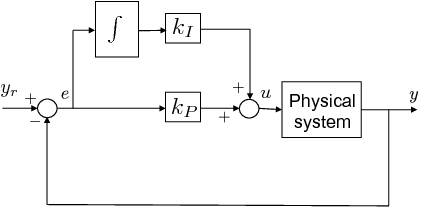

In [0]:
img2

***Here is a Proportional-Integral (PI) controller.  This controller uses the error to correct itself directly - with the proportional control, and it also integrates the error so that the system responds to error that was in the system in the past.***

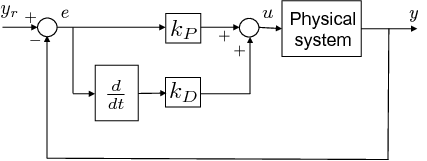

In [0]:
img3

***This controller is a Proportional-Derivative (PD) controller.  Again, the control responds to the error in the system, but then we also take the derivative of the error.  The derivative provides the slope or trend of the error, giving the control an anticipatory response capability.***

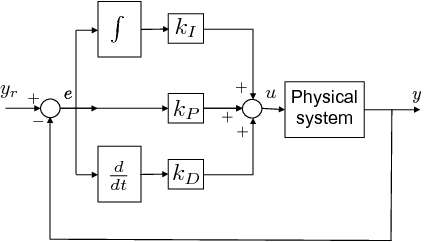

In [0]:
img4

***Bringing the concepts from the above two figures together provides the classic PID controller.***

The following plot demonstrates what sections of a step response curve are affected by the different portions of the PID controller.  This figure should help you develop an intuitive feel for how the different parameters in the controller can effect the system response. 

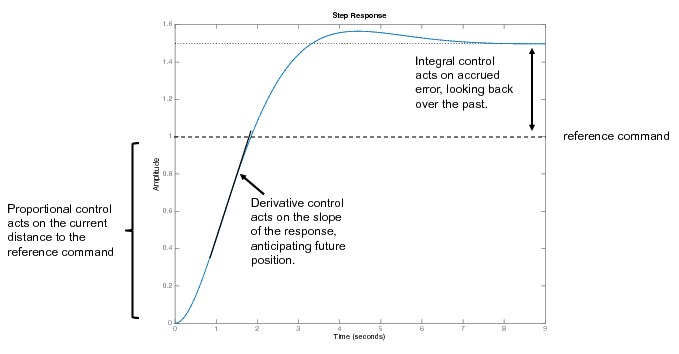

In [0]:
img5

TODO: make a code version of the above figure, using real data, and make it interactive!!

## Pole Placement Theory
Suppose we have a model for a linearized physical system like so:

$$P(s) = \frac{b_0}{s^2 + a_1 s + a+0}$$

The open loop poles of $P(s)$ are the roots of the *open root characteristic polynomial*: $s^2 + a_1 s + a_0$, which are given by: 

$$p_{ol} = - \frac{a_1}{2} \pm \sqrt{\left(\frac{a_1}{2} \right)^2 - a_0}$$

### Add PD Control
Next, if we add a PD controller, as shown in the figure below, we get a *new* characteristic polynomial, the *closed-loop characteristic polynomial*.  

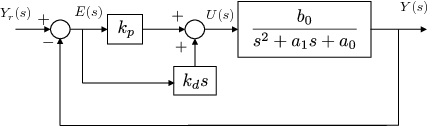

In [0]:
img6

***PD Controller for the proposed system***

We get the following closed loop transfer function: 

$$ Y(s) = \frac{b_0 k_D s + b_0 k_P}{s^2 + (a_1 + b_0 k_D) s + (a_0 + b_0 k_P)} Y_r(s) $$

Which gives the closed loop characteristic polynomial of $s^2 + (a_1 + b_0 k_D) s + (a_0 + b_0 k_P)$, with roots of: 

$$p_{cl} = - \frac{a_1 + b_0 k_D}{2} \pm \sqrt{\left(\frac{a_1 + b_0 k_D}{2} \right)^2 - (a_0 + b_0 k_P)}$$

Now, we are getting somewhere!  We can *choose* where we want these poles to be located, by selecting $k_P$ and $k_D$ appropriately. 

### Choose Gains

If we have some desired pole locations (we will get to how to find these later in the course) $-p_1^d$ and $-p_2^d$, then to form the desired characteristic polynomial $(s + p_1^d)(s+p_2^d) \triangleq s^2 + \alpha_1 s + \alpha_0$.  Which we can then solve for what $k_P$ and $k_D$ should be: 


\begin{eqnarray}
k_P = & \frac{\alpha_0 -a_0}{b_0} \\
k_D = & \frac{\alpha_1 - a_1}{b_0} 
\end{eqnarray}

### Note: Implementation Concerns for $p_D$ Control
If you implement a $p_D$ controller as described above, you end up introducing a *zero* (root of the numerator polynomial) that was not there before.  If instead, you implement a $p_D$ controller as illustrated in Figure below, by only differentiating the output $y$ instead of the error, you eliminate the zero. 

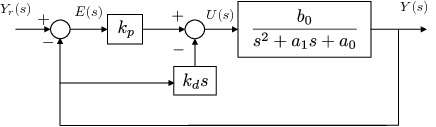

In [0]:
img7

So the new transfer function would look like this: 

\begin{equation}
Y(s) = \frac{b_0 k_P}{s^2 + (a_1 + b_) k_D)s + (a_0 + b_0 k_P)}Y_r(s)
\end{equation}

# Design Study A. Single Link Robot Arm Example
(a) Given the open loop transfer function, find the open loop poles of the system, when the equilibrium angle is $\theta_e = 0$. 

(b) Using the PD control architecture shown in Figure TODO, find the closed loop transfer function from $\theta_r$ to $\theta$ and find the closed loop poles as a function of $k_P$ and $k_D$. 

(c) Select $k_P$ and $k_D$ to place the closed loop poles at $p_1 = -3$ and $p_2 = -4$. 

(d) Using the gains from part (c), implement the PD control for the single link robot arm in python, simulink, or Matlab and plot the step response.  

In [0]:
import sys
sys.path.append('./arm')  # add arm directory
sys.path.append('./arm/hw7') # add hw directory we are using
import matplotlib.pyplot as plt
import numpy as np
import armParam as P
import control as c

## A Part (a): Find the open loop poles of the system
Here is the open loop transfer function from Problem A.6: 

$$H(s) = \frac{\frac{3}{m l^2}}{s^2 + \frac{3b}{m l^2}s}$$

In [0]:
num = 3./(P.m*P.ell*P.ell)
den = [1., (3.*P.b)/(P.m*P.ell*P.ell), 0]

H = c.tf(num,den)
display(H)


    66.67
-------------
s^2 + 3.333 s

Open Loop poles: 

In [0]:
c.pole(H)

array([-3.33333333,  0.        ])

## A Part (b): Find the closed loop transfer function, assuming the second architecture approach

Given equation 7.3, with $b_0 = 66.667$ and $a_1 = 3.333$ and $a_0 = 0.0$, we have: 

\begin{equation}
H_{cl}(s) = \frac{66.667 k_P}{s^2 + (3.333 + 66.667 k_D)s + 66.667 k_P}
\end{equation}


$$p_{cl} = - \frac{3.333 + 66.667 k_D}{2} \pm \sqrt{\left(\frac{3.333 + 66.667 k_D}{2} \right)^2 - (66.667 k_P)}$$

## A Part (c) Select $k_P$ and $k_D$

In [0]:
from sympy import *

s = Symbol('s')

expand((s + 3)*(s+4))

s**2 + 7*s + 12

So for $\alpha_0 = 12$ and $\alpha_1 = 7$.  This allows us to define $k_P$ and $k_D$ as

In [0]:
alp1 = 7.
alp0 = 12.
b0 = 66.667
a0 = 0.
a1 = 3.333

kP = (alp0 - a0)/b0
kD = (alp1 - a1)/b0

display(kP)
display(kD)

0.17999910000449998

0.05500472497637511

## A Part (d) Implement the PD Controller 

In [0]:
import matplotlib.pyplot as plt
%matplotlib tk  
#Allows the images to come up as pop-up, so that the animations will occur properly
import numpy as np
import armParam as P
from armDynamics import armDynamics
from armController import armController
from signalGenerator import signalGenerator
from armAnimation import armAnimation
from armPlotData import armPlotData

# instantiate arm, controller, and reference classes
arm = armDynamics()
ctrl = armController()
reference = signalGenerator(amplitude=30*np.pi/180.0, frequency=0.05)

# instantiate the simulation plots and animation
dataPlot = armPlotData()
animation = armAnimation()

t = P.t_start  # time starts at t_start
while t < P.t_end:  # main simulation loop
    # Get referenced inputs from signal generators
    ref_input = reference.square(t)
    # Propagate dynamics in between plot samples
    t_next_plot = t + P.t_plot
    while t < t_next_plot: # updates control and dynamics at faster simulation rate
        u = ctrl.u(ref_input, arm.outputs())  # Calculate the control value
        arm.propagateDynamics(u)  # Propagate the dynamics
        t = t + P.Ts  # advance time by Ts
    # update animation and data plots
    animation.drawArm(arm.states())
    dataPlot.updatePlots(t, ref_input, arm.states(), u)
    plt.pause(0.0001)  # the pause causes the figure to be displayed during the simulation




kp:  0.18
kd:  0.095
